#Simulação do sistema novo
 Neste modelo, estamos simulando a previsão do resultado do modelo de reclassificação, usando cadeia de Markov. A cadeia de Markov é uma ferramenta estatística que nos permite prever eventos futuros com base em estados atuais e probabilidades de transição. O problema consiste em prever o estado (Correto ou Incorreto) em um determinado número de compras, usando uma matriz de transição de estados.


## Importação das bibliotecas necessárias


In [2]:
!pip install flask-ngrok
!ngrok authtoken '27efkTyH0DtigedGS6vnkrcbpqj_4iNT2PCVKPEqpsewei6YW'

/bin/bash: line 1: ngrok: command not found


In [3]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt
from flask_ngrok import run_with_ngrok

###Nessa etapa, foram adicionados os dois estados, Correto e Incorreto, e também as sequências de possíveis eventos, e no final a matriz de probabilidade no código

In [5]:
# Novos estados
states = ["Correto", "Excecao1", "Excecao2", "Falha"]

# Novas sequências possíveis de eventos
transitionName = [["CC", "C1", "C2", "CF"], ["1C", "11", "12", "1F"], ["2C", "21", "22", "2F"], ["FC", "F1", "F2", "FF"]]

# Nova matriz de probabilidades (matriz de transição)
transitionMatrix = [[0.85, 0.05, 0.05, 0.05], [0.05, 0.85, 0.05, 0.05], [0.05, 0.05, 0.85, 0.05], [0.05, 0.05, 0.05, 0.85]]


In [6]:
from flask import Flask, request, jsonify

app = Flask(__name__)
run_with_ngrok(app)

In [7]:
@app.route("/")
def index():
  return jsonify({

      "message": "Send POST request with data in body to check results."
  })

##Lógica de simulação

No código a seguir, é definida uma função chamada "forecast" que implementa um modelo de Markov para prever o estado. A função recebe um argumento, "purchase", que representa o número de dias a serem previstos.

E no final é possível escolher a quantidade de compras que se deseja simular

Estado inicial: Correto
Possíveis estados: ['Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Falha', 'Falha', 'Falha', 'Excecao2', 'Excecao2', 'Excecao2', 'Excecao2', 'Falha', 'Falha', 'Falha', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao2', 'Excecao2', 'Excecao2', 'Excecao2', 'Excecao2', 'Excecao2', 'Excecao1', 'Correto', 'Excecao2', 'Excecao2', 'Excecao2', 'Correto', 'Correto', 'Falha', 'Falha', 'Falha', 'Falha', 'Falha', 'Falha', 'Falha', 'Falha', 'Falha', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Excecao1', 'Falha', 'Falha', 'Falha', 'Falha', 'Falha', 'Falha', 'Excecao1', 'Excecao1', 'Excecao1', 'Falha', 'Falha', 

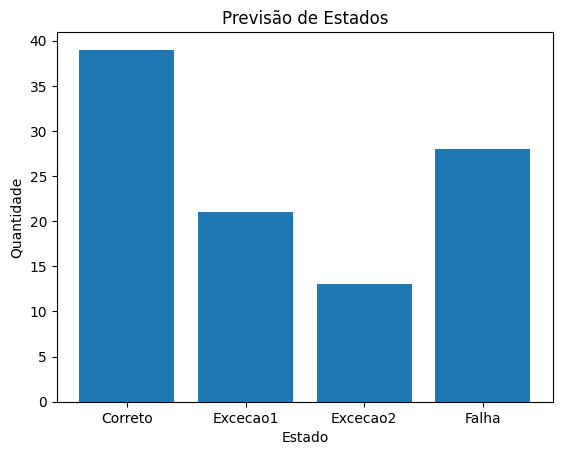

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://4050-34-86-94-76.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [8]:
# Função que implementa o modelo de Markov para prever o estado
def forecast(purchase):
    # Escolha o estado inicial
    currentStatus = "Correto"
    print("Estado inicial: " + currentStatus)

    # Armazene a sequência de estados
    statusSequence = [currentStatus]
    prob_sequence = []

    i = 0
    prob = 1

    while i != purchase:
        if currentStatus == "Correto":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "CC":
                prob = prob * 0.85
                statusSequence.append("Correto")
            elif change == "C1":
                prob = prob * 0.05
                currentStatus = "Excecao1"
                statusSequence.append("Excecao1")
            elif change == "C2":
                prob = prob * 0.05
                currentStatus = "Excecao2"
                statusSequence.append("Excecao2")
            else:
                prob = prob * 0.05
                currentStatus = "Falha"
                statusSequence.append("Falha")
        elif currentStatus == "Excecao1":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "1C":
                prob = prob * 0.05
                currentStatus = "Correto"
                statusSequence.append("Correto")
            elif change == "11":
                prob = prob * 0.85
                statusSequence.append("Excecao1")
            elif change == "12":
                prob = prob * 0.05
                currentStatus = "Excecao2"
                statusSequence.append("Excecao2")
            else:
                prob = prob * 0.05
                currentStatus = "Falha"
                statusSequence.append("Falha")
        elif currentStatus == "Excecao2":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "2C":
                prob = prob * 0.05
                currentStatus = "Correto"
                statusSequence.append("Correto")
            elif change == "21":
                prob = prob * 0.05
                currentStatus = "Excecao1"
                statusSequence.append("Excecao1")
            elif change == "22":
                prob = prob * 0.85
                statusSequence.append("Excecao2")
            else:
                prob = prob * 0.05
                currentStatus = "Falha"
                statusSequence.append("Falha")
        else:  # "Falha"
            change = np.random.choice(transitionName[3], replace=True, p=transitionMatrix[3])
            if change == "FC":
                prob = prob * 0.05
                currentStatus = "Correto"
                statusSequence.append("Correto")
            elif change == "F1":
                prob = prob * 0.05
                currentStatus = "Excecao1"
                statusSequence.append("Excecao1")
            elif change == "F2":
                prob = prob * 0.05
                currentStatus = "Excecao2"
                statusSequence.append("Excecao2")
            else:
                prob = prob * 0.85
                statusSequence.append("Falha")
        prob_sequence.append(prob)
        i += 1

    print("Possíveis estados: " + str(statusSequence))
    print("Probabilidade da sequência de estados: " + str(prob))

    return statusSequence, prob_sequence

# Função para prever o estado possível nas próximas compras
sequencia_estados, probabilidades = forecast(100)

# Armazene contagens de estados
estado_counts = {
    "Correto": sequencia_estados.count("Correto"),
    "Excecao1": sequencia_estados.count("Excecao1"),
    "Excecao2": sequencia_estados.count("Excecao2"),
    "Falha": sequencia_estados.count("Falha")
}

# Crie um gráfico de barras
plt.bar(estado_counts.keys(), estado_counts.values())
plt.xlabel("Estado")
plt.ylabel("Quantidade")
plt.title("Previsão de Estados")
plt.show()

@app.route('/simulate', methods=['POST'])
def simulate():
    try:
        data = request.get_json()
        purchase = data.get("purchase", 10000)  # Valor padrão de compra, se não for fornecido no JSON
        sequencia_estados, probabilidades = forecast(purchase)
        correto_count = sequencia_estados.count("Correto")
        incorreto_count = sequencia_estados.count("Incorreto")

        result = {
            "estados": ["Correto", "Incorreto"],
            "quantidades": [correto_count, incorreto_count]
        }

        return jsonify(result), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run()


Quantidade de cada estado:
Correto: 37
Excecao1: 5
Excecao2: 3
Falha: 6


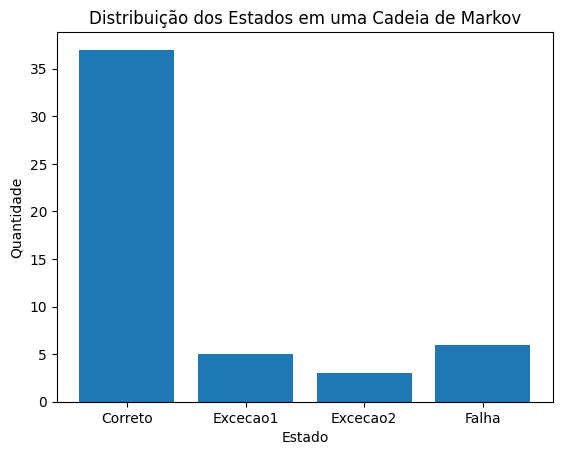

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Função para simular a cadeia de Markov
def markov_chain(trans_matrix, initial_state, steps):
    current_state = initial_state
    states_sequence = [current_state]

    for _ in range(steps):
        current_state = np.random.choice(['Correto', 'Excecao1', 'Excecao2', 'Falha'], p=trans_matrix[current_state])
        states_sequence.append(current_state)

    return states_sequence

# Definindo a matriz de transição
trans_matrix = {
    'Correto': [0.85, 0.05, 0.05, 0.05],  # Probabilidades de ir de 'Correto' para cada um dos estados
    'Excecao1': [0.85, 0.05, 0.05, 0.05],  # Probabilidades de ir de 'Falha1' para cada um dos estados
    'Excecao2': [0.85, 0.05, 0.05, 0.05],  # Probabilidades de ir de 'Falha2' para cada um dos estados
    'Falha': [0.85, 0.05, 0.05, 0.05]   # Probabilidades de ir de 'Falha3' para cada um dos estados
}

# Simular a cadeia de Markov para 50 amostras
initial_state = 'Correto'
steps = 50
sequence = markov_chain(trans_matrix, initial_state, steps)

# Contar a ocorrência de cada estado
estado_counts = {
    "Correto": sequence.count("Correto"),
    "Excecao1": sequence.count("Excecao1"),
    "Excecao2": sequence.count("Excecao2"),
    "Falha": sequence.count("Falha")
}

# Imprimir a quantidade de cada estado
print("\nQuantidade de cada estado:")
for estado, quantidade in estado_counts.items():
    print(f"{estado}: {quantidade}")

# Criar o gráfico de barras
plt.bar(estado_counts.keys(), estado_counts.values())
plt.xlabel("Estado")
plt.ylabel("Quantidade")
plt.title("Distribuição dos Estados em uma Cadeia de Markov")
plt.show()



In [ ]:
# Função para simular ataques indevidos
def simulate_attacks(purchase):
    attack_states = ["Ataque", "Seguro"]
    attack_probabilities = [0.1, 0.9]

    attack_sequence = [rm.choices(attack_states, attack_probabilities) for _ in range(purchase)]

    return attack_sequence

In [ ]:

# Função fictícia para criptografar estados
def encrypt_state(state):
    return f"Cripto-{state}"

# Função fictícia para criptografar ataques
def encrypt_attack(attack):
    return f"Cripto-{attack}"

In [ ]:
# Função para simular a segurança dos dados
def simulate_security(purchase, precision):
    sequencia_estados, probabilidades = forecast(purchase, precision)
    attack_sequence = simulate_attacks(purchase)

    for i in range(len(sequencia_estados)):
        if sequencia_estados[i] == "Correto":
            # Aumente a probabilidade de permanecer em "Correto" com base na precisão
            probabilidades[i] *= 0.95  # Exemplo: 95% de precisão
        else:
            # Aumente a probabilidade de permanecer em "Incorreto" com base na precisão
            probabilidades[i] *= 0.85

    return sequencia_estados, attack_sequence, probabilidades


In [ ]:
# Função para simular o desempenho
def simulate_performance(purchase, precision):
    start_time = time.time()
    sequencia_estados, attack_sequence, probabilidades = simulate_security(purchase, precision)
    end_time = time.time()
    response_time = end_time - start_time

    if response_time > 30:
        optimize_code()

    return sequencia_estados, attack_sequence, probabilidades, response_time

# Função fictícia para otimizar o código
def optimize_code():
    print("Otimizando o código...")


In [ ]:
# Função para simular tolerância a falhas
def simulate_fault_tolerance(purchase, precision):
    sequencia_estados, attack_sequence, probabilidades, response_time = simulate_performance(purchase, precision)

    if response_time > 30:
        try:
            reconnect_to_database()
        except ConnectionError:
            handle_connection_failure()

    return sequencia_estados, attack_sequence, probabilidades, response_time

In [ ]:
# Função fictícia para reconectar ao banco de dados
def reconnect_to_database():
    print("Tentando reconectar ao banco de dados...")

# Função fictícia para lidar com falha de conexão
def handle_connection_failure():
    print("Lidando com falha de conexão...")
